In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler


In [31]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"]
y = data["labels"]

In [32]:
print(x.shape)
print(x)

torch.Size([49984, 344])
tensor([[-4.0658,  0.4799,  0.2382,  ...,  0.1069,  0.6385, -0.6550],
        [-0.6265, -0.6888,  0.3135,  ...,  0.9682,  3.7766, -1.7888],
        [ 1.8558, -0.4909,  0.0466,  ..., -0.8001, -1.6884, -2.9808],
        ...,
        [-1.7552, -2.7167,  0.0688,  ...,  0.0928, -2.6108, -1.0271],
        [-4.9407, -0.0754,  0.2270,  ..., -0.3963,  6.9203,  1.0549],
        [-4.2442,  0.6847,  0.3223,  ...,  0.0873,  0.0090,  0.5538]])


In [33]:
# normalize the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.79422998  0.31073217  0.8466967  ...  0.05511847  0.34089785
  -0.38548242]
 [ 0.06681789 -0.46497986  1.64957886 ...  0.55651235  1.90479349
  -1.10661588]
 [ 0.68827947 -0.33365929 -1.19682446 ... -0.47284786 -0.81873599
  -1.86478567]
 ...
 [-0.21575711 -1.81103654 -0.96018947 ...  0.04693091 -1.27845021
  -0.62213173]
 [-1.01327525 -0.05786803  0.72689465 ... -0.237784    3.47148819
   0.70207937]
 [-0.83889153  0.44667431  1.74406266 ...  0.04372579  0.02717888
   0.38335267]]


In [34]:
x_1 = np.array(x[:5000, :], dtype=np.double)
print(x_1.shape)

(5000, 344)


In [35]:
#do PCA with 100 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x_pca = pca.fit_transform(x)
print(x_pca.shape)

(49984, 100)


In [36]:
# gaussian mixture model find centroids

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=100, covariance_type='full', random_state=0)
gmm.fit(x_pca)

GaussianMixture(n_components=100, random_state=0)

In [44]:
# gaussian mixture model find centroids

from sklearn.mixture import GaussianMixture

gmm_10 = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
gmm_10.fit(x_pca)

GaussianMixture(n_components=10, random_state=0)

In [37]:
print(gmm.means_.shape)
print(gmm.means_)
print(gmm.covariances_.shape)
print(gmm.covariances_)

(100, 100)
[[ 1.04093032e+00 -1.77675571e+00 -2.14090858e+00 ...  1.42439927e-01
  -1.04863376e-01  3.65616487e-03]
 [ 1.80225766e+00 -5.43929856e-02 -1.38459485e+00 ...  8.60505894e-03
   1.19073370e-02  1.65695562e-01]
 [ 3.00701986e-01  4.40317339e+00 -1.13991348e+00 ...  3.53412816e-02
   5.02935883e-02  5.43860951e-02]
 ...
 [ 8.64916031e-01  3.54599152e+00  3.63305294e+00 ...  4.22009603e-03
   2.00896283e-01 -3.24443966e-02]
 [ 2.02341594e-01  1.83663043e+00  5.34574352e+00 ... -8.38426242e-02
   2.30831993e-01 -7.08671598e-02]
 [ 8.61484670e-01 -3.06915757e-01  4.34577289e+00 ...  4.26287197e-02
   1.19177884e-01 -2.10727276e-01]]
(100, 100, 100)
[[[ 7.58761607e+00  7.13535733e-01  5.67723175e-01 ... -5.28298988e-01
    3.79398634e-02 -1.42840407e-01]
  [ 7.13535733e-01  6.71938430e+00  3.51518272e-01 ...  9.56698542e-02
   -2.06230248e-01  1.18121339e-01]
  [ 5.67723175e-01  3.51518272e-01  4.74422242e+00 ... -1.82259512e-01
   -1.48566489e-01  7.18146535e-02]
  ...
  [-5.2829

In [38]:
labels = gmm.predict(x_pca)
gmm.means_.shape

(100, 100)

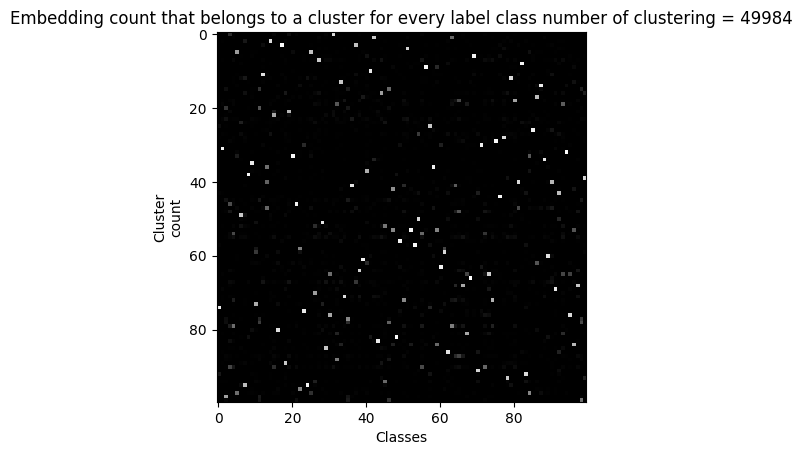

In [39]:
a = np.zeros((gmm.means_.shape[0],100))

#print(a)

for i, cluster in enumerate(labels):
    a[cluster][y[i]] += 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(labels.shape[0]))
plt.imshow(a,cmap='Greys_r')


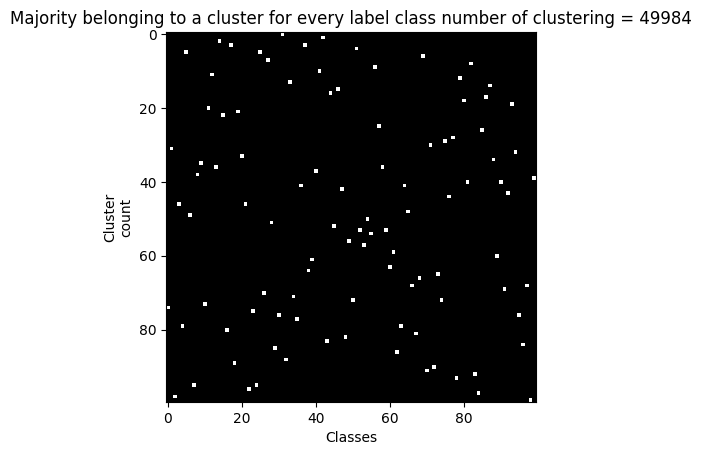

In [40]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((gmm.means_.shape[0],100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering = " + str(labels.shape[0]))
plt.imshow(c, cmap='Greys_r')

In [41]:
np.sum(c, axis=1)

array([1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 0., 2., 0., 1., 1., 1.,
       1., 1., 2., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 0., 2., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 1.])

In [43]:
false_negative = np.ma.array(a,mask=c)
sum_fn = np.sum(false_negative)
print(sum_fn/49840)

0.36825842696629213


In [46]:
labels = gmm_10.predict(x_pca)
gmm_10.means_.shape

(10, 100)

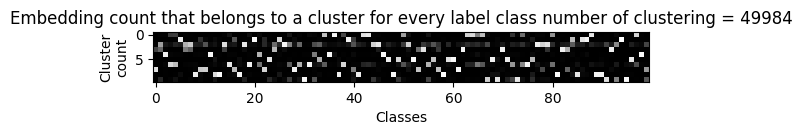

In [47]:
a = np.zeros((gmm_10.means_.shape[0],100))

#print(a)

for i, cluster in enumerate(labels):
    a[cluster][y[i]] += 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(labels.shape[0]))
plt.imshow(a,cmap='Greys_r')


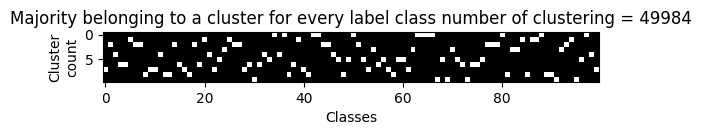

In [49]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((gmm_10.means_.shape[0],100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering = " + str(labels.shape[0]))
plt.imshow(c, cmap='Greys_r')

In [50]:
np.sum(c, axis=1)

array([12.,  8., 14.,  7.,  7., 12., 11., 11., 12.,  6.])